EXPLORATORY DATA ANALYSIS ON THE MOTORCYCLE SALES DATA OF COMPANY XYZ

The challenge; 

1) what are the total sales for each payment method

2) What is the average unit price for each product line?

3) Create plots to visualize findings for question 1 and 2

4) Optional: investigate further (e.g average purchase value by client type, total purchase value by product line)

5) Summarize your findings

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
import dateutil.parser

In [24]:
salesdata = pd.read_excel(r'C:\Users\H- -C\salesdata.xlsx')
salesdata

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card
...,...,...,...,...,...,...,...,...
995,2021-08-28,Central,Retail,Electrical system,9,32.87,295.83,Credit card
996,2021-08-28,West,Wholesale,Breaking system,32,10.03,320.96,Transfer
997,2021-08-28,West,Wholesale,Electrical system,12,32.80,393.64,Transfer
998,2021-08-28,North,Retail,Frame & body,5,48.25,241.23,Cash


In [17]:
#Checking the datatype for each column
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


Above information shows that all the columns are in the right data type format.

In [ ]:
#Checking for missing values in the dataset
salesdata.isnull().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

In [ ]:
#Checking for duplicates
salesdata[salesdata.duplicated()]

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment


Observations

- The dataset has 1000 rows and 8 columns
- There are no missing values and duplicates
- The dataset is clean and ready to use for analysis

In [ ]:
#Checking the statiscal summary of the numerical columns; Quantity, Unitprice, Total
salesdata.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


In [ ]:
#I also be checking the summary of the categorical data 
df = salesdata.dtypes[salesdata.dtypes == 'object'].index
salesdata[df].describe()

,warehouse,client_type,product_line,payment
count,1000,1000,1000,1000
unique,3,2,6,3
top,Central,Retail,Breaking system,Credit card
freq,480,775,230,659


Above 2 tables shows a summary of the numerical and categorical columns. 

- There are 3 unique warehouses, 2 unique client type, 6 unique product line and 3 umique payment methods
- The most frequent client type is the retail, the most frequently used payment method is the credit card, the most used warehouse is central and the most purchased product_line is Breaking system


In [ ]:
#checking the unique values for the warehouse
salesdata.warehouse.unique()

array(['Central', 'North', 'West'], dtype=object)

In [ ]:
#checking the unique values for the clienttype
salesdata.client_type.unique()

array(['Retail', 'Wholesale'], dtype=object)

In [ ]:
#checking the unique values for the product line
salesdata.product_line.unique()

array(['Miscellaneous', 'Breaking system', 'Suspension & traction',
       'Frame & body', 'Engine', 'Electrical system'], dtype=object)

In [ ]:
#checking the unique values for the payment methods
salesdata.payment.unique()

array(['Credit card', 'Cash', 'Transfer'], dtype=object)

In [25]:
#Question 1 - Total sales per payment method
tsppm = salesdata.groupby('payment', as_index=False).sum('total')
tsppm

,payment,quantity,unit_price,total
0,Cash,627,3479.98,19199.10
1,Credit card,3588,19992.33,110271.57
2,Transfer,5180,6849.73,159642.33


In [26]:
#Question 2 - Average unit price for each product line
AUPPPL = salesdata.groupby('product_line', as_index=False).mean('unit_price')
AUPPPL

,product_line,quantity,unit_price,total
0,Breaking system,9.260870,17.740522,166.739783
1,Electrical system,8.797927,25.585130,225.972591
2,Engine,10.278689,60.091803,622.055410
3,Frame & body,9.753012,42.832229,415.811627
4,Miscellaneous,9.639344,22.810738,222.670656
5,Suspension & traction,9.407895,33.969868,320.237763


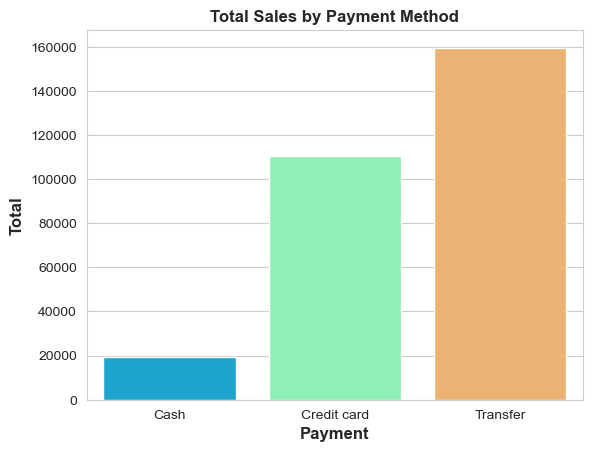

In [27]:
#Question 3i - plot to visualize Question 1
ax =sns.barplot(x='payment', y='total', data = tsppm, palette='rainbow')
plt.xlabel('Payment', size=12, fontweight = 'bold')
plt.ylabel('Total', size=12, fontweight = 'bold')
plt.title('Total Sales by Payment Method', size=12, fontweight = 'bold')
plt.show()

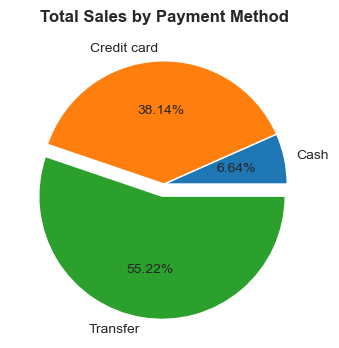

In [37]:
fig = plt.figure(figsize =(7, 4))
myexplode = (0,0,0.1)
Payment = ['Cash', 'Credit card', 'Transfer']
Total = [19199.10, 110271.57, 159642.33]
plt.pie(Total, labels = Payment, explode = myexplode, autopct='%1.2f%%')
plt.title('Total Sales by Payment Method', size=12, fontweight = 'bold')
plt.show()

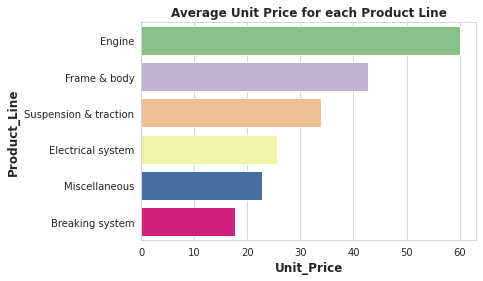

In [ ]:
#Question 3ii - plot to visualize Question 2
sns.barplot(data = AUPPPL.sort_values('unit_price',ascending = False), x='unit_price', y='product_line', palette='Accent')
plt.xlabel('Unit_Price', size=12, fontweight = 'bold')
plt.ylabel('Product_Line', size=12, fontweight = 'bold')
plt.title('Average Unit Price for each Product Line', size=12, fontweight = 'bold')
plt.show()

In [38]:
#Question 4i - Average purchase value by client type
APVCT = salesdata.groupby('client_type', as_index=False).mean('total')
APVCT

,client_type,quantity,unit_price,total
0,Retail,5.438710,30.286852,167.058929
1,Wholesale,23.022222,30.443244,709.521467


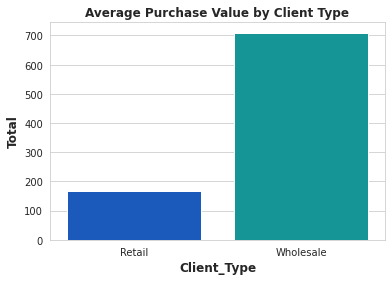

In [ ]:
#Plot for Question 4i
sns.barplot(data = APVCT, x='client_type', y='total', palette='winter')
plt.xlabel('Client_Type', size=12, fontweight = 'bold')
plt.ylabel('Total', size=12, fontweight = 'bold')
plt.title('Average Purchase Value by Client Type', size=12, fontweight = 'bold')
plt.show()

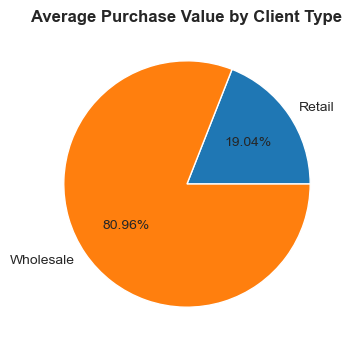

In [43]:
fig = plt.figure(figsize =(7, 4))
myexplode = (0,0)
Client_type = ['Retail', 'Wholesale']
X = [167, 710]
plt.pie(X, labels = Client_type, explode = myexplode, autopct='%1.2f%%')
plt.title('Average Purchase Value by Client Type', size=12, fontweight = 'bold')
plt.show()

In [44]:
#Question 4ii - Total purchase value by product line
TPVPI = salesdata.groupby('product_line', as_index=False).sum('total')
TPVPI

,product_line,quantity,unit_price,total
0,Breaking system,2130,4080.32,38350.15
1,Electrical system,1698,4937.93,43612.71
2,Engine,627,3665.60,37945.38
3,Frame & body,1619,7110.15,69024.73
4,Miscellaneous,1176,2782.91,27165.82
5,Suspension & traction,2145,7745.13,73014.21


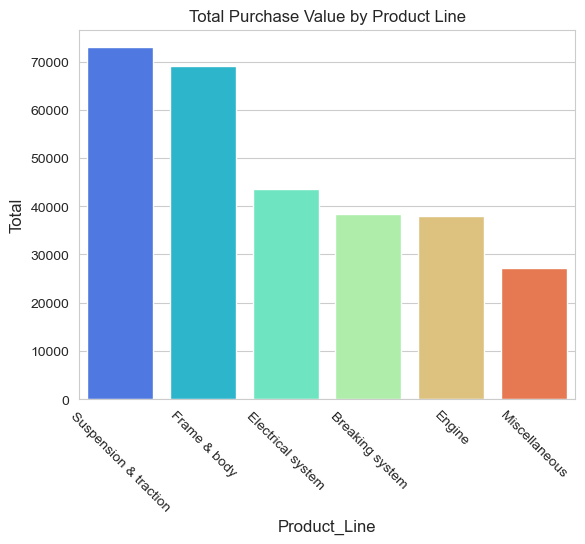

In [45]:
#Plot to visualize above data
p = sns.barplot(data = TPVPI.sort_values('total', ascending=False), x='product_line', y='total', palette='rainbow')
plt.xlabel('Product_Line', size=12)
plt.ylabel('Total', size=12)
plt.title('Total Purchase Value by Product Line', size=12)
p.set_xticklabels(p.get_xticklabels(), rotation = -45)
plt.show()

In [46]:
#Other Insights - i: Most used payment type
MUPT = salesdata.groupby('payment', as_index=False).count()
MUPT

,payment,date,warehouse,client_type,product_line,quantity,unit_price,total
0,Cash,116,116,116,116,116,116,116
1,Credit card,659,659,659,659,659,659,659
2,Transfer,225,225,225,225,225,225,225


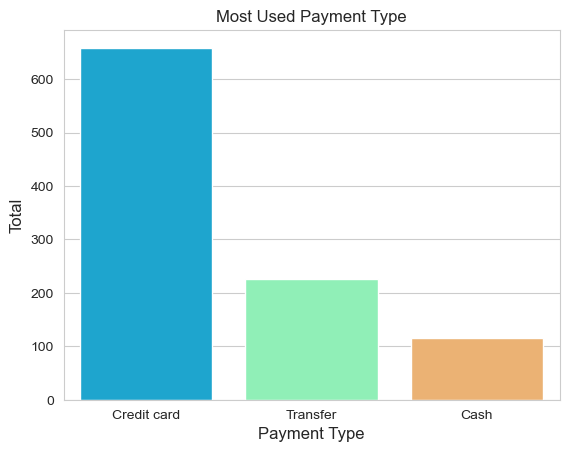

In [47]:
#Plot to visualize above data
sns.barplot(data = MUPT.sort_values('total', ascending=False), x='payment', y='total', palette='rainbow')
plt.xlabel('Payment Type', size=12)
plt.ylabel('Total', size=12)
plt.title('Most Used Payment Type', size=12)
plt.show()

In [48]:
#Most Used Warehouse
MUW = salesdata.groupby('warehouse', as_index=False).count()
MUW

,warehouse,date,client_type,product_line,quantity,unit_price,total,payment
0,Central,480,480,480,480,480,480,480
1,North,340,340,340,340,340,340,340
2,West,180,180,180,180,180,180,180


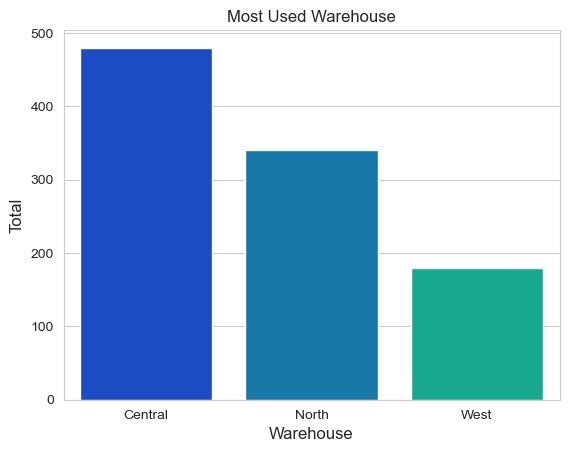

In [49]:
#Plot to visualize above
sns.barplot(data = MUW.sort_values('total', ascending=False), x='warehouse', y='total', palette='winter')
plt.xlabel('Warehouse', size=12)
plt.ylabel('Total', size=12)
plt.title('Most Used Warehouse', size=12)
plt.show()

In [54]:
#Extracting the month from the date column
salesdata['Month'] = salesdata['date'].dt.month
salesdata['Month']

0      6
1      6
2      6
3      6
4      6
      ..
995    8
996    8
997    8
998    8
999    8
Name: Month, Length: 1000, dtype: int64

In [55]:
salesdata['Month'].unique()

array([6, 7, 8], dtype=int64)

In [57]:
salesdata

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,Month
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,6
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,6
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,6
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,6
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,6
...,...,...,...,...,...,...,...,...,...
995,2021-08-28,Central,Retail,Electrical system,9,32.87,295.83,Credit card,8
996,2021-08-28,West,Wholesale,Breaking system,32,10.03,320.96,Transfer,8
997,2021-08-28,West,Wholesale,Electrical system,12,32.80,393.64,Transfer,8
998,2021-08-28,North,Retail,Frame & body,5,48.25,241.23,Cash,8


In [58]:
#Checking for the month with the highest sales
monthly_sales = salesdata.groupby('Month', as_index=False).sum('total')
monthly_sales

,Month,quantity,unit_price,total
0,6,3044,10488.45,95320.03
1,7,3160,10332.91,93547.91
2,8,3191,9500.68,100245.06


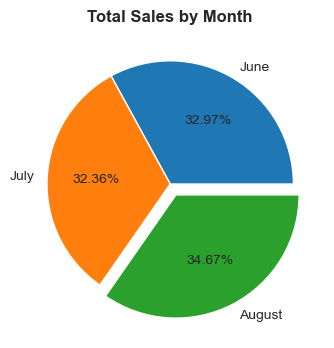

In [59]:
fig = plt.figure(figsize =(7, 4))
myexplode = (0,0,0.1)
Payment = ['June', 'July', 'August']
Total = [95320.03, 93547.91, 100245.06]
plt.pie(Total, labels = Payment, explode = myexplode, autopct='%1.2f%%')
plt.title('Total Sales by Month', size=12, fontweight = 'bold')
plt.show()

5. Summary of insights from the data above;

- Central warehouse is the most used warehouse and also has the highest total sales. 

- Creditcard is the most used payment method. However, 'transfer' payment method brought in the highest sales.

- Suspension and traction product line had the highest purchases while the engine product line had the least purchases.

- The total purchase value of wholesale clients was far greater than that of the retail clients even though sales by retail client were more frequent.

- Highest sales of products was recorded in August.